# Python Assignment 3

ECE 7995_1801_003: Detection and Estimation 
Submitted By: Prabhjot Kaur

In [99]:
import numpy as np
from scipy import linalg
from sklearn import datasets

import matplotlib.pyplot as plt

In [100]:
#### Q1 Repeat steps (1)-(3) from PA#2, loading the digits dataset, learning the mean for classes "0" and "1", 
#       and defining the likelihood functions as before. You do not need to display any sample images.

#load the dataset
digits = datasets.load_digits()

# learn the mean for class 0 and class 1
count_cl0 =0
count_cl1 =0
sum_cl0 = 0
sum_cl1 = 0
for i in range(0, digits.data.shape[0]):
    if digits.target[i] == 0:
        count_cl0 = count_cl0 + 1
        sum_cl0 = sum_cl0 + digits.images[i]
    elif digits.target[i] == 1:
        count_cl1 = count_cl1 + 1;
        sum_cl1 = sum_cl1 + digits.images[i]
        
mu_0 = sum_cl0/count_cl0  #(8x8)
mu_1 = sum_cl1/count_cl1

mu_0 = mu_0.flatten()
mu_1 = mu_1.flatten()

In [102]:
# Q2: For sigma^2  = 1000, derive the MAP classifier (i.e., the classifier that minimizes the probability of classification error) for pi_0 = 1/2. 
#     Draw 1000 samples from the classes (using this prior!) and compute empirically the probability of error. 
#     Repeat for pi_0=1/4 and pi_0 = 3/4

sigma_2 = 1000;
sample_size = 1000
pi_0 =  np.array([1/2, 1/4, 3/4])
pi_1 = 1-pi_0

# Define the likelihood functions for class 0 and class 1
cov = np.dot(sigma_2,np.eye(mu_0.shape[0])) # Covaraince for samples in class 0 and class 1
y_0 = np.random.multivariate_normal(mu_0,cov)
y_1 = np.random.multivariate_normal(mu_1,cov)
hypotheses = [y_0, y_1] #list containing 2 elements: H0 and H1 ==> p(y|H0) and p(y|H1)

# derive the MAP classifier
var = np.dot(np.transpose(mu_1-mu_0),np.linalg.inv(cov))

P_err_H0 = np.zeros(pi_0.size)    
Pd_H1 = np.zeros(pi_0.size)

for prior in range(0, pi_0.size):
    for k in range(0, sample_size):
        rand_sample_index = np.random.choice(len(hypotheses),1,p=[pi_0[prior],pi_1[prior]]) #choose the hypthesis to draw the sample from
        if rand_sample_index ==0:
            y = np.random.multivariate_normal(mu_0,cov)
        elif rand_sample_index ==1:
            y = np.random.multivariate_normal(mu_1,cov)
            
        # LRT    
        compare = np.dot(var,y)
        if compare > np.log(pi_0[prior])/np.log(pi_1[prior]):
            P_err_H0[prior] = (P_err_H0[prior]) + 1/sample_size
                                            
        elif compare > np.log(pi_0[prior])/np.log(pi_1[prior]):
            Pd_H1[prior] = (Pd_H1[prior]) + 1/sample_size 
            
    print(P_err_H0[prior])
    

0.2780000000000002
0.003
0.33500000000000024


C:\Users\NZLNM3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\NZLNM3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


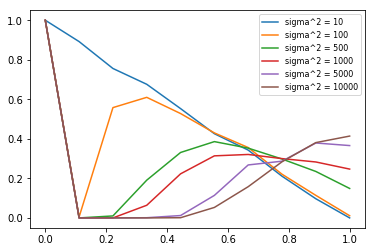

In [104]:
#Q3: For noise variances sigma^2 = {10,100,500,1000,5000,10000}, numerically compute and plot the probability of error 
#    as a function of pi_0. Do this by estimating the probability of error for a range of values 0 <= pi_0 <= 1 
#    and plotting the result

sigma_2 = np.array([10,100,500,1000,5000,10000])
sample_size = 1000
pi_0 = np.linspace(0,1,10)  #range of priors for H0
pi_1 = 1-pi_0
P_err_H0 = np.zeros((sigma_2.size, pi_0.size))    
Pd_H1 = np.zeros((sigma_2.size, pi_0.size))

for sigma in range(0,sigma_2.size):
    cov = np.dot(sigma_2[sigma],np.eye(mu_0.shape[0])) # Covaraince for samples in class 0 and class 1 (case of same covariance)
    y_0 = np.random.multivariate_normal(mu_0,cov)
    y_1 = np.random.multivariate_normal(mu_1,cov)
    hypotheses = [y_0, y_1] #list containing 2 elements: H0 and H1 ==> p(y|H0) and p(y|H1)
  
    var = np.dot(np.transpose(mu_1-mu_0),np.linalg.inv(cov))

    for prior in range(0, pi_0.size):
        for k in range(0, sample_size):
            rand_sample_index = np.random.choice(len(hypotheses),1,p=[pi_0[prior],pi_1[prior]])  #choose the hypthesis to draw the sample from
            if rand_sample_index ==0:
                y = np.random.multivariate_normal(mu_0,cov)
            elif rand_sample_index ==1:
                y = np.random.multivariate_normal(mu_1,cov)
            
            # LRT    
            compare_0 = np.dot(var,y)
            if compare_0 > np.log(pi_0[prior])/np.log(pi_1[prior]):
                P_err_H0[sigma,prior] = (P_err_H0[sigma,prior]) + 1/sample_size
            elif compare_0 > np.log(pi_0[prior])/np.log(pi_1[prior]):
                Pd_H1[sigma,prior] = (Pd_H1[sigma,prior]) +1/sample_size
            
plt.plot(pi_0,P_err_H0[0, :],pi_0,P_err_H0[1, :],pi_0,P_err_H0[2, :],pi_0,P_err_H0[3, :],pi_0,P_err_H0[4, :],pi_0,P_err_H0[5, :])
plt.gca().legend(['sigma^2 = 10','sigma^2 = 100','sigma^2 = 500','sigma^2 = 1000','sigma^2 = 5000','sigma^2 = 10000'],loc=0,fontsize=8)
plt.show()

C:\Users\NZLNM3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
C:\Users\NZLNM3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\NZLNM3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
C:\Users\NZLNM3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\NZLNM3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log
C:\Users\NZLNM3\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in double_scalars


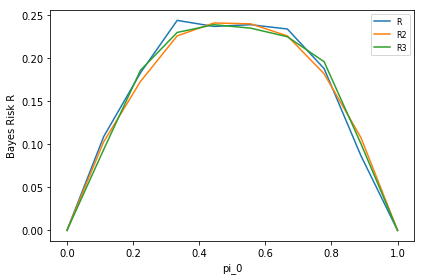

In [107]:
#Q4:Fix sigma^2 = 1000. Consider the cost functions C00=C00=0, C10=C01=1. 
#   Derive the optimum Bayes detector and the *Bayes risk* as a function of pi_0. 
#   Repeat for cost functions C10=5,C01=1 and C10=1,C01=5. Plot all three Bayes risk curves on the same axis. 
#   Where is the worst case prior in each case? Why.

sigma_2 = 1000
cov = np.dot(sigma_2,np.eye(mu_0.shape[0]))
sample_size = 1000
C_00 = 0
C_11 = 0
C_10 = 1
C_01 = 1

pi_0s = np.linspace(0,1,10)
R = np.zeros(pi_0s.size)
var = np.dot(np.transpose(mu_1-mu_0),np.linalg.inv(cov))

for i in range(0,pi_0s.size):
    this_pi0 = pi_0s[i]
    this_pi1 = 1- this_pi0
    threshold = np.log(((C_10-C_00)*this_pi0)/((C_01-C_11)*this_pi1))

    for k in range(0,sample_size):
        #draw a sample from H, and then from p(y|H)
        H = np.random.choice(2,p=[this_pi0,this_pi1])
        if(H==0):
            y = np.random.multivariate_normal(mu_0,cov)
            compare_0 = np.dot(var,y)
            if(compare_0<threshold):
                R[i] += C_00/sample_size
            else:
                R[i] += C_10/sample_size
        else:
            y = np.random.multivariate_normal(mu_1,cov)
            compare_0 = np.dot(var,y)
            if(compare_0<threshold):
                R[i] += C_01/sample_size
            else:
                R[i] += C_11/sample_size  

# For the second set of cost functions
C10=5
C01=1
R2 = np.zeros(pi_0s.size)

for i in range(0,pi_0s.size):
    this_pi0 = pi_0s[i]
    this_pi1 = 1- this_pi0
    threshold = np.log(((C_10-C_00)*this_pi0)/((C_01-C_11)*this_pi1))

    for k in range(0,sample_size):
        #draw a sample from H, and then from p(y|H)
        H = np.random.choice(2,p=[this_pi0,this_pi1])
        if(H==0):
            y = np.random.multivariate_normal(mu_0,cov)
            compare_0 = np.dot(var,y)
            if(compare_0<threshold):
                R2[i] += C_00/sample_size
            else:
                R2[i] += C_10/sample_size
        else:
            y = np.random.multivariate_normal(mu_1,cov)
            compare_0 = np.dot(var,y)
            if(compare_0<threshold):
                R2[i] += C_01/sample_size
            else:
                R2[i] += C_11/sample_size  
                

# For the third set of cost functions
C10=1
C01=5                
R3 = np.zeros(pi_0s.size)

for i in range(0,pi_0s.size):
    this_pi0 = pi_0s[i]
    this_pi1 = 1- this_pi0
    threshold = np.log(((C_10-C_00)*this_pi0)/((C_01-C_11)*this_pi1))

    for k in range(0,sample_size):
        #draw a sample from H, and then from p(y|H)
        H = np.random.choice(2,p=[this_pi0,this_pi1])
        if(H==0):
            y = np.random.multivariate_normal(mu_0,cov)
            compare_0 = np.dot(var,y)
            if(compare_0<threshold):
                R3[i] += C_00/sample_size
            else:
                R3[i] += C_10/sample_size
        else:
            y = np.random.multivariate_normal(mu_1,cov)
            compare_0 = np.dot(var,y)
            if(compare_0<threshold):
                R3[i] += C_01/sample_size
            else:
                R3[i] += C_11/sample_size                
                
                
                
plt.plot(pi_0s,R,pi_0s,R2,pi_0s,R3)

plt.xlabel("pi_0")
plt.ylabel("Bayes Risk R")
plt.gca().legend(['R','R2','R3'],loc=0,fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
# The worst case prior in each case is around 0.5